In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import h5py,glob
plt.rcParams.update({'font.size': 16})
from math import *

# set your file set here!

fileset='./*.csv'

In [2]:
def VNAtranslator(allscans, rows_to_cut=51):
    freqs = []
    mags = []
    for i in range(len(allscans)):
        data = []
        with open(allscans[i], 'rt') as f:
            reader = csv.reader(f)
            for row in reader:
                #print(row)
                data.append(row)
        data_np = np.array(data)
#         print(i)
#         print(i)
#         print(i)
#         print(data_np[:rows_to_cut])
        datafinal = data_np[rows_to_cut:-1]
        #print(datafinal)
        df=[]
        freq1 = []
        mag1 = []
        for i in datafinal:
            freq1.append(float(i[0]))
            mag1.append(float(i[1]))   
        freqs.append(freq1)
        mags.append(mag1)
    return(freqs,mags)

In [3]:
#empty

allscans=np.sort(glob.glob(fileset))
if("test_1" in fileset):
    allscans=allscans[:-1]
print(allscans)

freqs,mags=VNAtranslator(allscans = allscans, rows_to_cut=51)

for i in range(len(freqs)):
    freqs[i] = np.array(freqs[i])/1000000000.
    mags[i] = np.array(mags[i])

print(len(allscans))
print(freqs[0][0])

['./Cage_drone_foil-000.csv' './Cage_drone_foil-001.csv'
 './Cage_drone_foil-002.csv' './Cage_drone_foil-003.csv'
 './Cage_drone_foil-004.csv' './Cage_drone_foil-005.csv'
 './Cage_drone_foil-006.csv' './Cage_drone_foil-007.csv'
 './Cage_drone_foil-008.csv' './Cage_drone_foil-009.csv'
 './Cage_drone_foil-010.csv' './Cage_drone_foil-011.csv'
 './Cage_drone_foil-012.csv' './Cage_drone_foil-013.csv'
 './Cage_drone_foil-014.csv' './Cage_drone_foil-015.csv'
 './Cage_drone_foil-016.csv' './Cage_drone_foil-017.csv'
 './Cage_drone_foil-018.csv' './Cage_drone_foil-019.csv'
 './Cage_drone_foil-020.csv' './Cage_drone_foil-021.csv'
 './Cage_drone_foil-022.csv' './Cage_drone_foil-023.csv'
 './Cage_drone_foil-024.csv' './Cage_drone_foil-025.csv'
 './Cage_drone_foil-026.csv' './Cage_drone_foil-027.csv'
 './Cage_drone_foil-028.csv' './Cage_drone_foil-029.csv'
 './Cage_drone_foil-030.csv' './Cage_drone_foil-031.csv'
 './Cage_drone_foil-032.csv' './Cage_drone_foil-033.csv'
 './Cage_drone_foil-034.csv' '.

<ipython-input-2-44bc50b1f890>:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data_np = np.array(data)


<ipython-input-47-93b50eccae19>:2: RuntimeWarning: invalid value encountered in log10
  old_mags_subtracted = 10.*np.log10(10.**(mags[-6]/10.) - (10.**(mags[-5]/10.)))
<ipython-input-47-93b50eccae19>:3: RuntimeWarning: invalid value encountered in log10
  minimal_tape_subtracted = 10.*np.log10(10.**(mags[11]/10.) - (10.**(mags[5]/10.)))
<ipython-input-47-93b50eccae19>:4: RuntimeWarning: invalid value encountered in log10
  more_tape_subtracted = 10.*np.log10(10.**(mags[47]/10.) - (10.**(mags[29]/10.)))
<ipython-input-47-93b50eccae19>:5: RuntimeWarning: invalid value encountered in log10
  most_tape_subtracted = 10.*np.log10(10.**(mags[53]/10.) - (10.**(mags[29]/10.)))


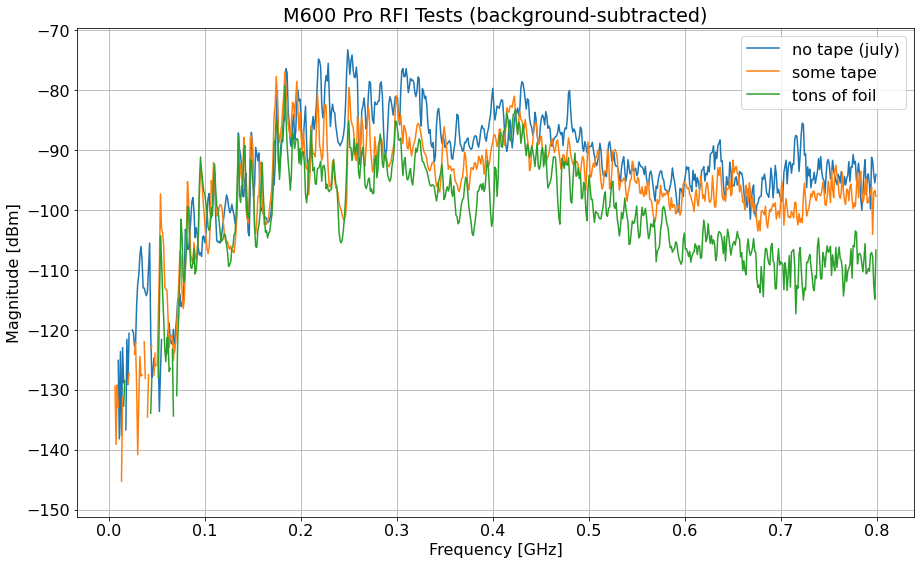

In [47]:
# background-subtracted 800MHz data
old_mags_subtracted = 10.*np.log10(10.**(mags[-6]/10.) - (10.**(mags[-5]/10.)))
minimal_tape_subtracted = 10.*np.log10(10.**(mags[11]/10.) - (10.**(mags[5]/10.)))
more_tape_subtracted = 10.*np.log10(10.**(mags[47]/10.) - (10.**(mags[29]/10.)))
most_tape_subtracted = 10.*np.log10(10.**(mags[53]/10.) - (10.**(mags[29]/10.)))

fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[-5], old_mags_subtracted, label="no tape (july)")
#plt.plot(freqs[11], minimal_tape_subtracted, label="some tape, bad cable")
plt.plot(freqs[11], more_tape_subtracted, label="some tape")
plt.plot(freqs[11], most_tape_subtracted, label="tons of foil")

#plt.xlim(0,2)
#plt.ylim(-100, -60)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (background-subtracted)")
plt.legend()
plt.grid()

plt.savefig("comparison_800mhz.png")
plt.show()


In [48]:
# background-subtracted 3GHz data
old_mags_subtracted = 10.*np.log10(10.**(mags[-7]/10.) - (10.**(mags[-4]/10.)))
minimal_tape_subtracted = 10.*np.log10(10.**(mags[10]/10.) - (10.**(mags[4]/10.)))
more_tape_subtracted = 10.*np.log10(10.**(mags[46]/10.) - (10.**(mags[28]/10.)))
most_tape_subtracted = 10.*np.log10(10.**(mags[52]/10.) - (10.**(mags[28]/10.)))

fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[-4], old_mags_subtracted, label="no tape (july)")
#plt.plot(freqs[10], minimal_tape_subtracted, label="some tape, bad cable")
plt.plot(freqs[10], more_tape_subtracted, label="some tape")
plt.plot(freqs[10], most_tape_subtracted, label="tons of foil")

#plt.xlim(0,2)
#plt.ylim(-100, -60)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (background-subtracted)")
plt.legend()
plt.grid()

plt.savefig("comparison_3ghz.png")
plt.show()


<ipython-input-48-d77667b26f18>:2: RuntimeWarning: invalid value encountered in log10
  old_mags_subtracted = 10.*np.log10(10.**(mags[-7]/10.) - (10.**(mags[-4]/10.)))
<ipython-input-48-d77667b26f18>:3: RuntimeWarning: invalid value encountered in log10
  minimal_tape_subtracted = 10.*np.log10(10.**(mags[10]/10.) - (10.**(mags[4]/10.)))
<ipython-input-48-d77667b26f18>:4: RuntimeWarning: invalid value encountered in log10
  more_tape_subtracted = 10.*np.log10(10.**(mags[46]/10.) - (10.**(mags[28]/10.)))
<ipython-input-48-d77667b26f18>:5: RuntimeWarning: invalid value encountered in log10
  most_tape_subtracted = 10.*np.log10(10.**(mags[52]/10.) - (10.**(mags[28]/10.)))


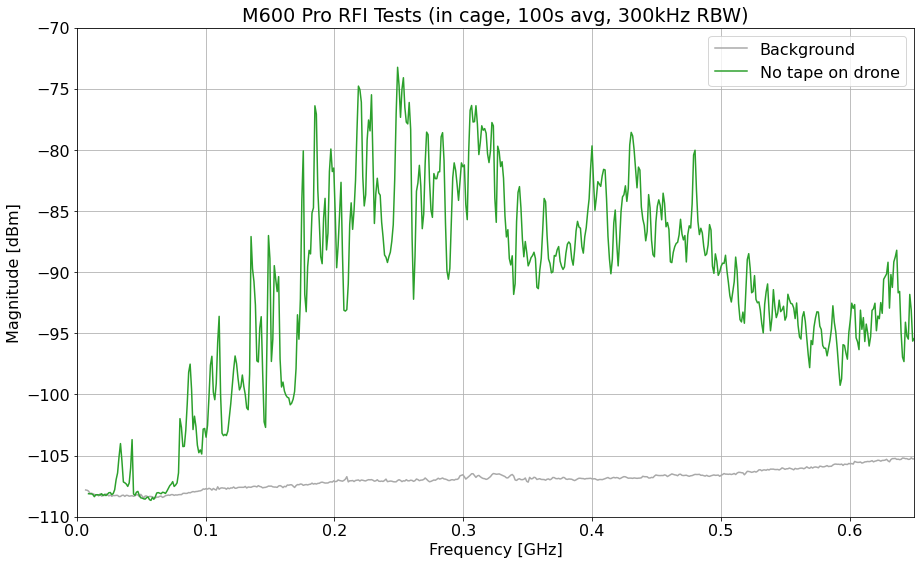

In [5]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[29], mags[29], label="Background", color="darkgrey")
plt.plot(freqs[-6], mags[-6], label="No tape on drone", color="tab:green")
#plt.plot(freqs[47], mags[47], label="Some tape on drone", color="tab:orange")
#plt.plot(freqs[53], mags[53], label="Drone covered in foil", color="tab:blue")

plt.xlim(0,0.65)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (in cage, 100s avg, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("background_800mhz.png")
plt.show()


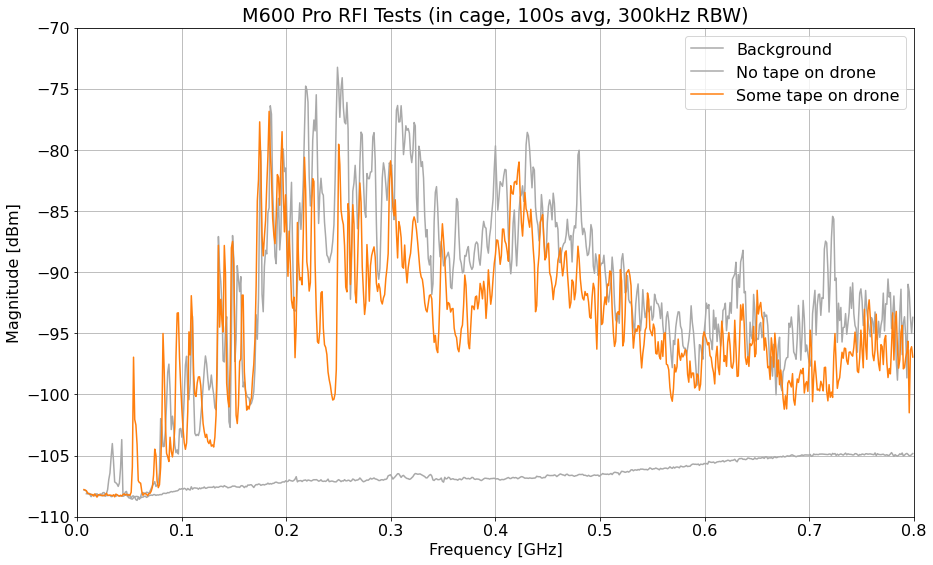

In [79]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[29], mags[29], label="Background", color="darkgrey")
plt.plot(freqs[-6], mags[-6], label="No tape on drone", color="darkgrey")
plt.plot(freqs[47], mags[47], label="Some tape on drone", color="tab:orange")
#plt.plot(freqs[53], mags[53], label="Drone covered in foil", color="tab:green")

plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (in cage, 100s avg, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("sometape_800mhz.png")
plt.show()


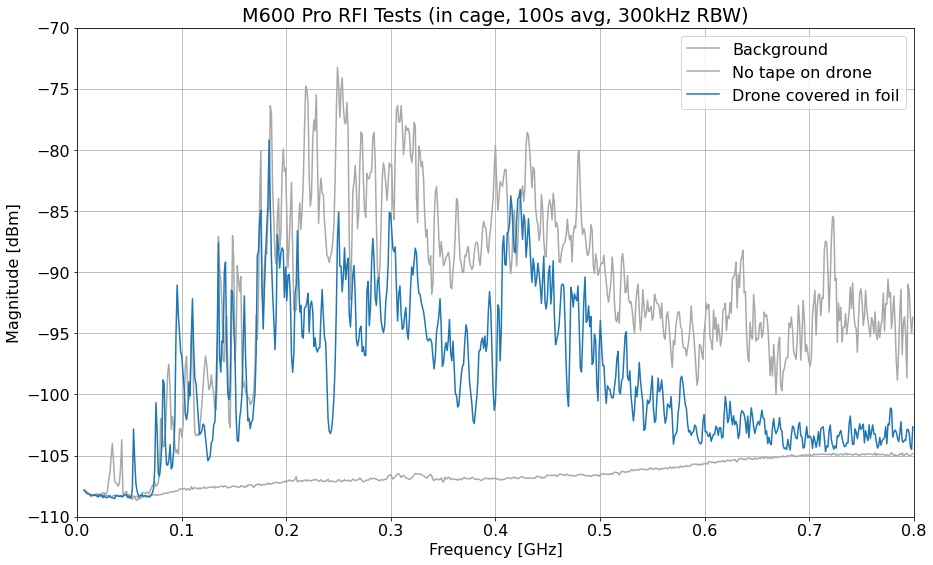

In [80]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[29], mags[29], label="Background", color="darkgrey")
plt.plot(freqs[-6], mags[-6], label="No tape on drone", color="darkgrey")
#plt.plot(freqs[47], mags[47], label="Some tape on drone", color="darkgrey")
plt.plot(freqs[53], mags[53], label="Drone covered in foil", color="tab:blue")

plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (in cage, 100s avg, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("background_800mhz.png")
plt.show()


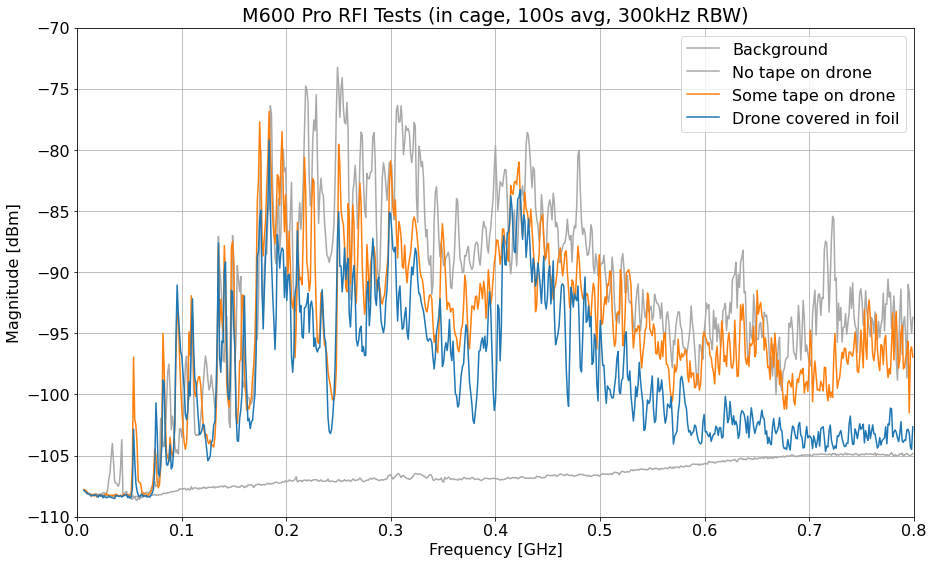

In [81]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[29], mags[29], label="Background", color="darkgrey")
plt.plot(freqs[-6], mags[-6], label="No tape on drone", color="darkgrey")
plt.plot(freqs[47], mags[47], label="Some tape on drone", color="tab:orange")
plt.plot(freqs[53], mags[53], label="Drone covered in foil", color="tab:blue")

plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (in cage, 100s avg, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("background_800mhz.png")
plt.show()


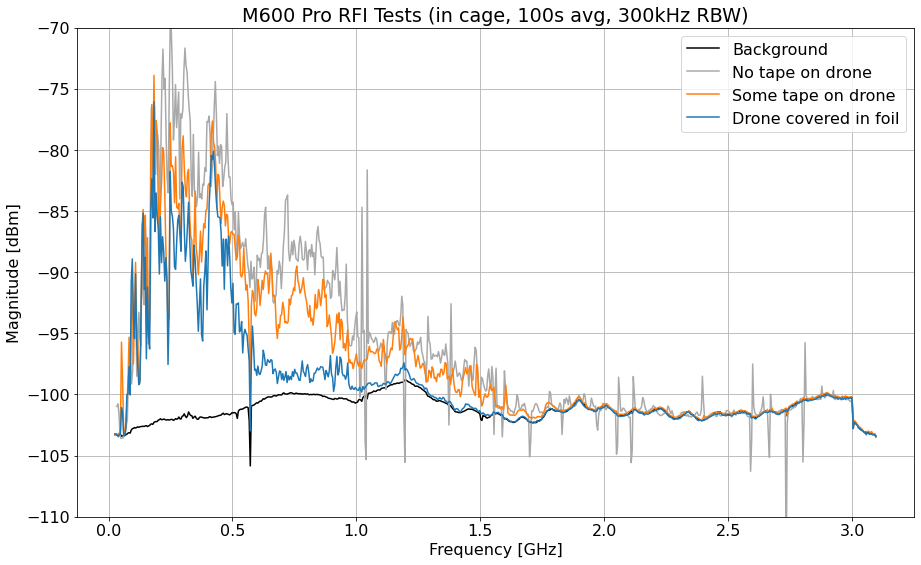

In [85]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[28], mags[28], label="Background", color="black")
plt.plot(freqs[-7], mags[-7], label="No tape on drone", color="darkgrey")
plt.plot(freqs[46], mags[46], label="Some tape on drone", color="tab:orange")
plt.plot(freqs[52], mags[52], label="Drone covered in foil", color="tab:blue")

#plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (in cage, 100s avg, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("background_3GHz.png")
plt.show()


In [12]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[32], mags[32], label=r"drone off, motors off")
plt.plot(freqs[26], mags[26], label=r"drone on, motors off")
plt.plot(freqs[34], mags[34], label=r"motor 5 running at 1.5%")

plt.xlim(0,2.7)
plt.ylim(-100, -55)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro Motor RFI Tests (50-sample average, PA off, 1MHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_1.png")
plt.show()


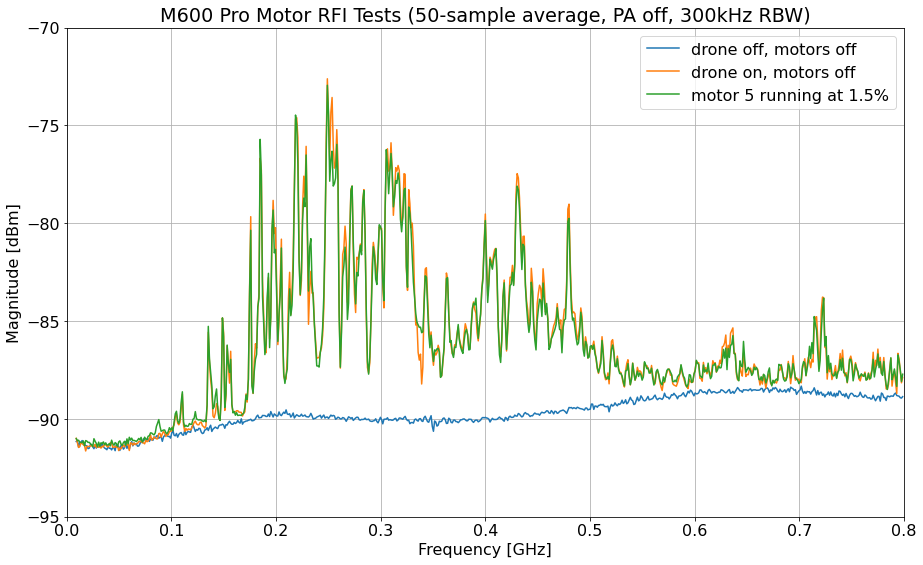

In [59]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[30], mags[30], label=r"drone off, motors off")
plt.plot(freqs[28], mags[28], label=r"drone on, motors off")
plt.plot(freqs[36], mags[36], label=r"motor 5 running at 1.5%")

plt.xlim(0,0.8)
plt.ylim(-95, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro Motor RFI Tests (50-sample average, PA off, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_2.png")
plt.show()


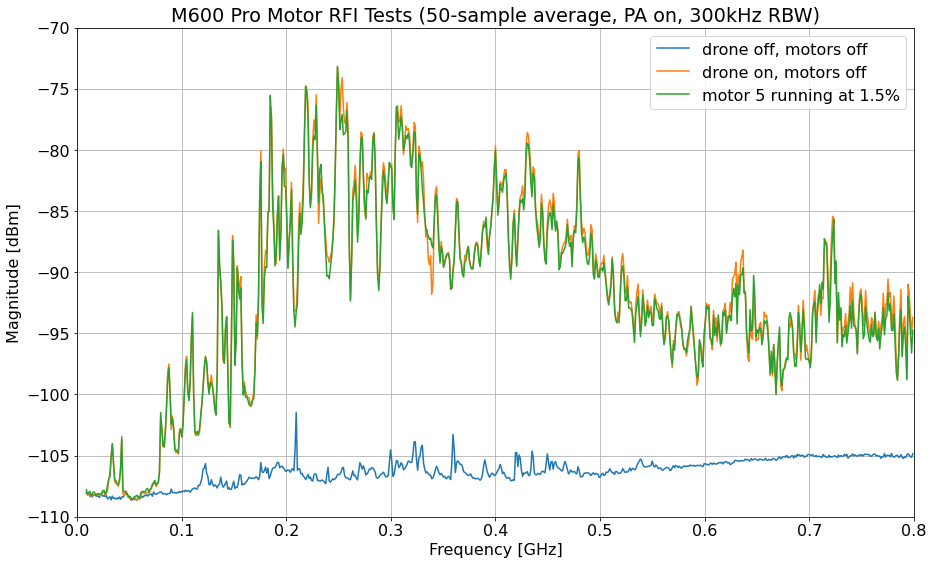

In [60]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[31], mags[31], label=r"drone off, motors off")
plt.plot(freqs[29], mags[29], label=r"drone on, motors off")
plt.plot(freqs[37], mags[37], label=r"motor 5 running at 1.5%")

plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro Motor RFI Tests (50-sample average, PA on, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_3.png")
plt.show()


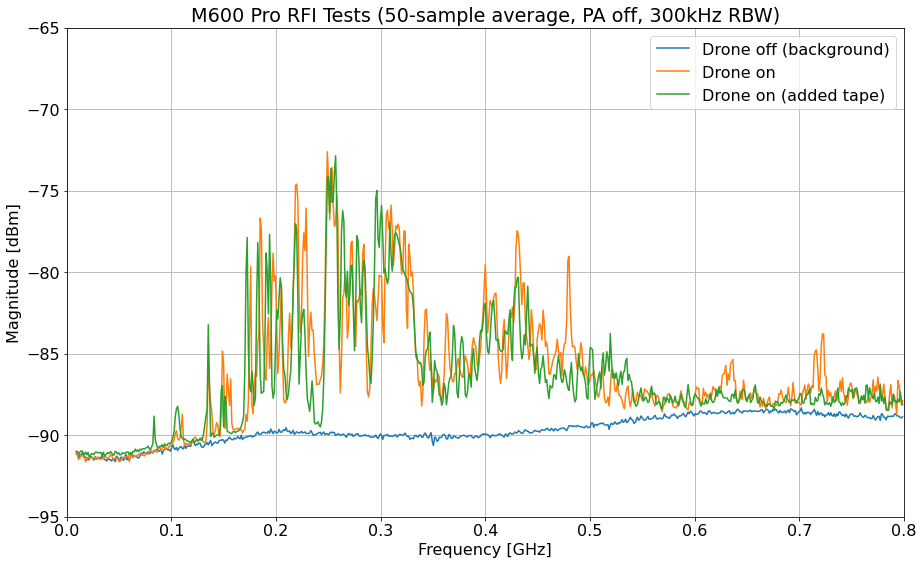

In [22]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[30], mags[30], label=r"Drone off (background)")
plt.plot(freqs[28], mags[28], label=r"Drone on")
plt.plot(freqs[39], mags[39], label=r"Drone on (added tape)")

plt.xlim(0,0.8)
plt.ylim(-95, -65)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (50-sample average, PA off, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_3.png")
plt.show()


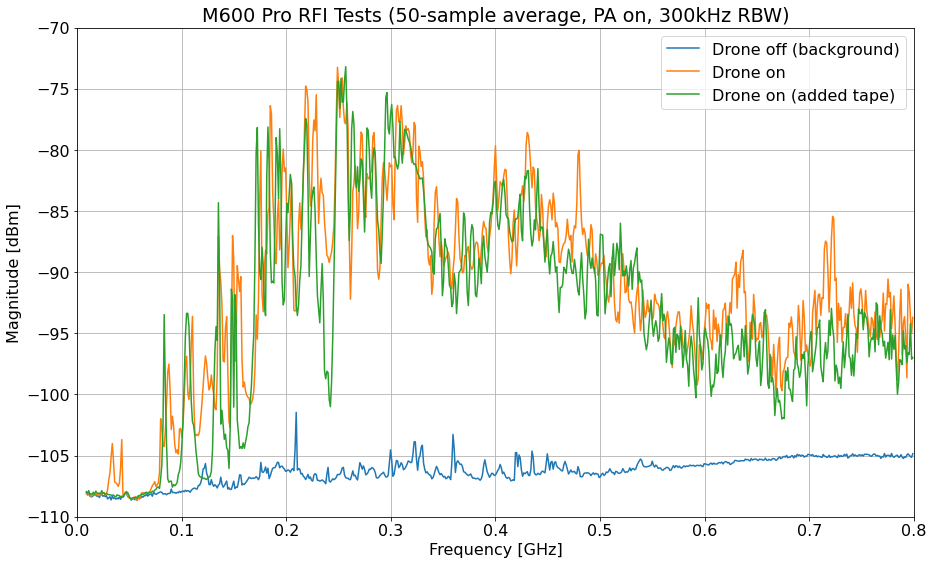

In [62]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[31], mags[31], label=r"Drone off (background)")
plt.plot(freqs[29], mags[29], label=r"Drone on")
plt.plot(freqs[40], mags[40], label=r"Drone on (added tape)")

plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (50-sample average, PA on, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_4.png")
plt.show()


In [88]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')
ax = plt.gca()

plt.plot(freqs[31], mags[31], label=r"Drone off (background)")
#plt.plot(freqs[28], mags[28], label=r"Drone on")
plt.plot(freqs[42], mags[42], label=r"Drone on")
plt.plot(freqs[44], mags[44], label=r"Drone on (antenna rotated 90)")
#plt.plot(freqs[45], mags[45], label=r"Drone on (tape, arms out, added random foam)")

#plt.vlines([0.1738, 0.2128, 0.2747, 0.301, 0.3475, 0.3686, 0.4256], -105, -50, 'grey', 'dashed', label=["101 mode", "111 mode", "102 mode", "211 mode", "202 mode", ""])
plt.vlines(0.1738, -125, -50, 'dimgray', 'dashed', label="Cage TE_101 mode")

plt.xlim(0,0.8)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (50-sample average, PA on, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_5.png")
plt.show()


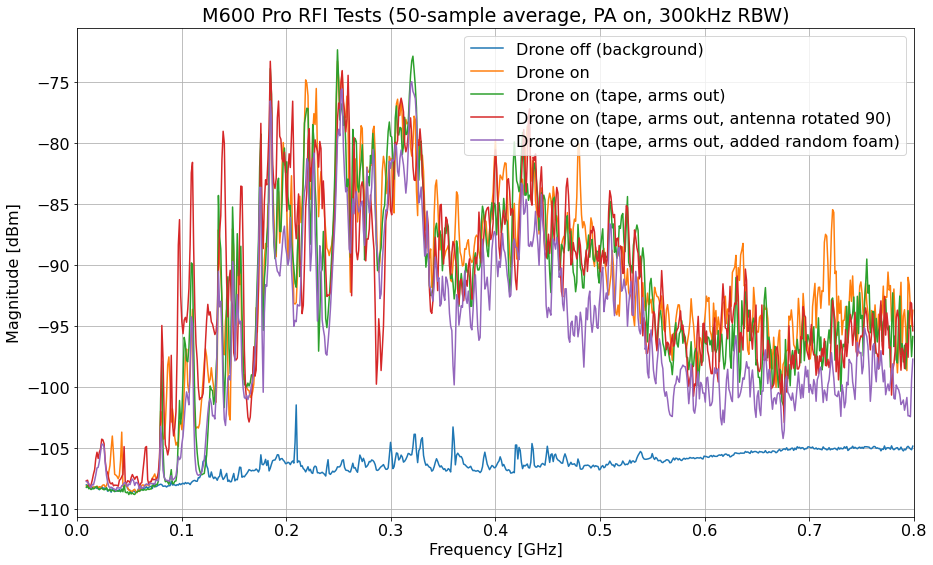

In [28]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')

plt.plot(freqs[31], mags[31], label=r"Drone off (background)")
plt.plot(freqs[29], mags[29], label=r"Drone on")
plt.plot(freqs[42], mags[42], label=r"Drone on (tape, arms out)")
plt.plot(freqs[44], mags[44], label=r"Drone on (tape, arms out, antenna rotated 90)")
plt.plot(freqs[46], mags[46], label=r"Drone on (tape, arms out, added random foam)")

plt.xlim(0,0.8)
#plt.ylim(-100, -55)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (50-sample average, PA on, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("newcage_6.png")
plt.show()


In [85]:
# calculate a whole bunch of resonant frequencies

# following pozar 285
# this coefficient is for an 8' symmetrical cube filled with air
a = 122.9 #MHz

# combinatorially go through all of the resonance modes
peak_freq = a # highest mode I've seen so far
stop_freq = 1000.0 # where to stop looking for resonances
highest_n = 1 # highest m,n,l wavenumber reached
res_freqs = [a*sqrt(2), a*sqrt(3)] # store the generated frequencies

while (peak_freq < stop_freq):
    n = highest_n + 1 # increment the wavenumber
    
    # generate all resonances with one of this new n
    for i in range(0,n):
        for j in range(i,n):
            if not(i==0) or not(j==0):
                print((i,j,n))
                res_freqs.append(a*sqrt(i**2+j**2+n**2))
    
    # generate all with two of the new n
    for i in range(0,n):
        print((i,n,n))
        res_freqs.append(a*sqrt(i**2+n**2+n**2))
    
    # and the one where all three are the new n
    print((n,n,n))
    res_freqs.append(a*sqrt(n**2+n**2+n**2))
    
    peak_freq = max(res_freqs)
    highest_n = n
    
print(res_freqs)

(0, 1, 2)
(1, 1, 2)
(0, 2, 2)
(1, 2, 2)
(2, 2, 2)
(0, 1, 3)
(0, 2, 3)
(1, 1, 3)
(1, 2, 3)
(2, 2, 3)
(0, 3, 3)
(1, 3, 3)
(2, 3, 3)
(3, 3, 3)
(0, 1, 4)
(0, 2, 4)
(0, 3, 4)
(1, 1, 4)
(1, 2, 4)
(1, 3, 4)
(2, 2, 4)
(2, 3, 4)
(3, 3, 4)
(0, 4, 4)
(1, 4, 4)
(2, 4, 4)
(3, 4, 4)
(4, 4, 4)
(0, 1, 5)
(0, 2, 5)
(0, 3, 5)
(0, 4, 5)
(1, 1, 5)
(1, 2, 5)
(1, 3, 5)
(1, 4, 5)
(2, 2, 5)
(2, 3, 5)
(2, 4, 5)
(3, 3, 5)
(3, 4, 5)
(4, 4, 5)
(0, 5, 5)
(1, 5, 5)
(2, 5, 5)
(3, 5, 5)
(4, 5, 5)
(5, 5, 5)
[173.80684681565342, 212.869044250215, 274.8127544347242, 301.04228938805255, 347.61369363130683, 368.70000000000005, 425.73808850043, 388.6439244346939, 443.12225175452426, 407.61318673467866, 459.8496928345174, 506.7296813884105, 521.4205404469601, 535.7086801611489, 576.4520968822995, 638.6071327506451, 506.7296813884105, 549.6255088694484, 614.5, 521.4205404469601, 563.1985529100727, 626.6694982205532, 602.0845787761051, 661.8367547968305, 716.6239878764875, 695.2273872626137, 706.0067492595238, 737.40000000000

In [86]:
fig = plt.figure(figsize=(15,9))
fig.patch.set_facecolor('white')
ax = plt.gca()

plt.plot(freqs[31], mags[31], label=r"Drone off (background)")
#plt.plot(freqs[28], mags[28], label=r"Drone on")
plt.plot(freqs[42], mags[42], label=r"Drone on")
plt.plot(freqs[44], mags[44], label=r"Drone on (antenna rotated 90)")
#plt.plot(freqs[45], mags[45], label=r"Drone on (tape, arms out, added random foam)")

#plt.vlines([0.1738, 0.2128, 0.2747, 0.301, 0.3475, 0.3686, 0.4256], -105, -50, 'grey', 'dashed', label=["101 mode", "111 mode", "102 mode", "211 mode", "202 mode", ""])
plt.vlines(np.array(res_freqs)/1000., -105, -50, 'dimgray', 'dashed', label="Cage resonances")

plt.xlim(0,0.6)
plt.ylim(-110, -70)
plt.xlabel("Frequency [GHz]")
plt.ylabel("Magnitude [dBm]")
plt.title("M600 Pro RFI Tests (50-sample average, PA on, 300kHz RBW)")
plt.legend()
plt.grid()

plt.savefig("toomanyresonances.png")
plt.show()
